In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers

In [2]:
def train_bpe_tokenizer(corpus_file, vocab_size):
    tokenizer = Tokenizer(models.BPE())
    tokenizer.pre_tokenizer = pre_tokenizers.Metaspace()
    tokenizer.decoder = decoders.Metaspace()
    trainer = trainers.BpeTrainer(
        vocab_size=vocab_size,
        min_frequency=2,
        show_progress=False,
        special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"]
    )
    tokenizer.train(files=[corpus_file], trainer=trainer)
    save_path = f"./tokenizers/bpe-vocab_{vocab_size}.json"
    tokenizer.save(save_path)
    return tokenizer

In [3]:
data_path = "./data/hye_wikipedia_2021_1M/cleaned_corpus_for_training.txt"
size_grid = [88, 100, 200, 500, 1000, 5000, 10000, 25000]

In [4]:
results = {}

for size in size_grid:
    results[size] = train_bpe_tokenizer(corpus_file=data_path, vocab_size=size)

In [5]:
for size in size_grid:
    tokenizer = results[size]
    sorted_vocab = sorted(tokenizer.get_vocab().items(), key=lambda item: item[1])
    N = len(sorted_vocab)
    print(f"Total vocab size: {N}")

    print("First and Last 15 tokens:")
    for token, token_id in sorted_vocab[:15] + sorted_vocab[-15:]:
        print(f"ID: {token_id}, Token: '{token}'")

Total vocab size: 93
First and Last 15 tokens:
ID: 0, Token: '[UNK]'
ID: 1, Token: '[CLS]'
ID: 2, Token: '[SEP]'
ID: 3, Token: '[PAD]'
ID: 4, Token: '[MASK]'
ID: 5, Token: '
'
ID: 6, Token: '!'
ID: 7, Token: '"'
ID: 8, Token: '''
ID: 9, Token: '('
ID: 10, Token: ')'
ID: 11, Token: ','
ID: 12, Token: '.'
ID: 13, Token: '0'
ID: 14, Token: '1'
ID: 78, Token: 'ջ'
ID: 79, Token: 'ռ'
ID: 80, Token: 'ս'
ID: 81, Token: 'վ'
ID: 82, Token: 'տ'
ID: 83, Token: 'ր'
ID: 84, Token: 'ց'
ID: 85, Token: 'ւ'
ID: 86, Token: 'փ'
ID: 87, Token: 'ք'
ID: 88, Token: 'օ'
ID: 89, Token: 'ֆ'
ID: 90, Token: 'և'
ID: 91, Token: '—'
ID: 92, Token: '▁'
Total vocab size: 100
First and Last 15 tokens:
ID: 0, Token: '[UNK]'
ID: 1, Token: '[CLS]'
ID: 2, Token: '[SEP]'
ID: 3, Token: '[PAD]'
ID: 4, Token: '[MASK]'
ID: 5, Token: '
'
ID: 6, Token: '!'
ID: 7, Token: '"'
ID: 8, Token: '''
ID: 9, Token: '('
ID: 10, Token: ')'
ID: 11, Token: ','
ID: 12, Token: '.'
ID: 13, Token: '0'
ID: 14, Token: '1'
ID: 85, Token: 'ւ'
ID: 86, T

In [6]:
calibration_data = []
with open(data_path, 'r') as f:
    for idx, l in enumerate(f):
        if idx == 10000:
            break
        calibration_data.append(l)

In [7]:
token_lengths = {}

for size in size_grid:
    tokenizer = results[size]
    encoded_batch = tokenizer.encode_batch(calibration_data)
    
    all_tokens = []
    for encoding in tqdm(encoded_batch):
        all_tokens.extend(encoding.tokens)
        
    token_lengths[size] = [len(token) for token in all_tokens]

100%|██████████| 10000/10000 [00:00<00:00, 140654.06it/s]


In [8]:
def vis_density(size_grid):
    plt.figure(figsize=(10, 10))

    for size in size_grid:
        sns.kdeplot(token_lengths[size], label=f'Vocab Size {size}', alpha=0.5)

    plt.title('Distribution of token lengths by Vocab Size')
    plt.xlabel('Length of token')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

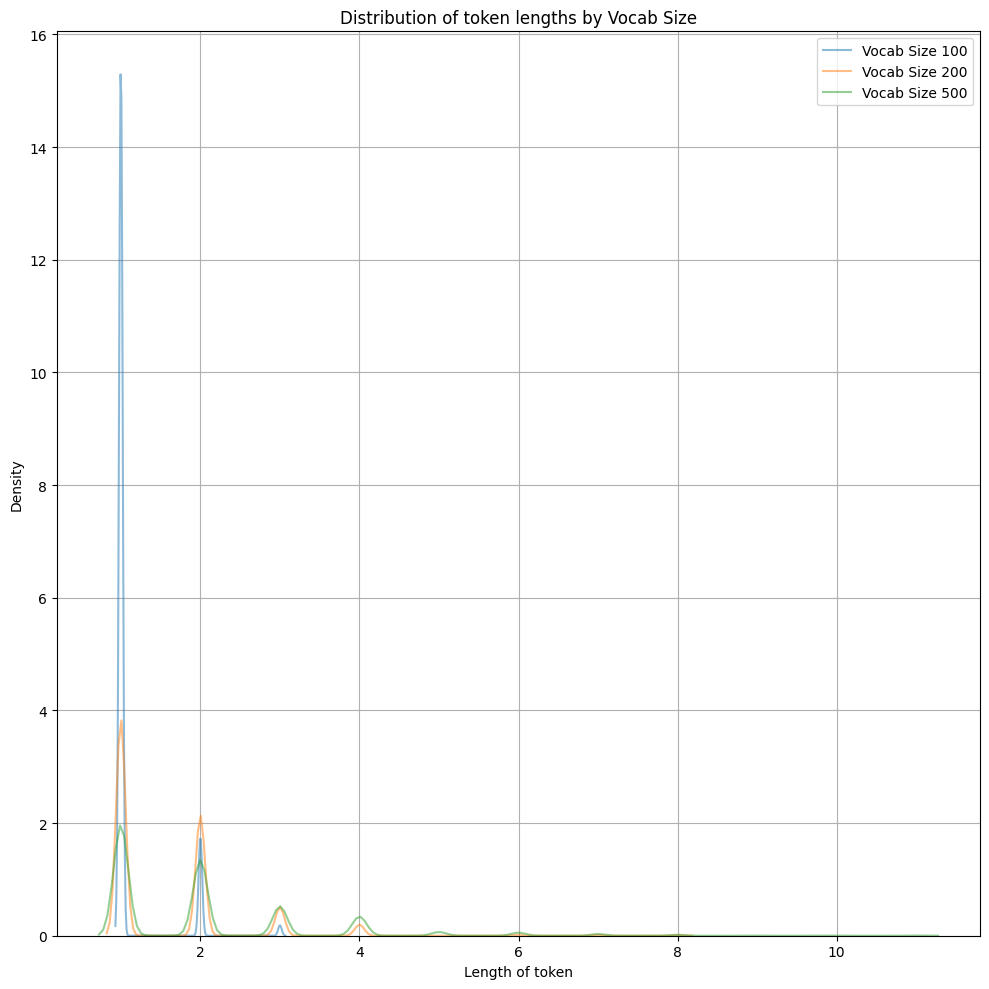

In [9]:
vis_density(size_grid[1:4])

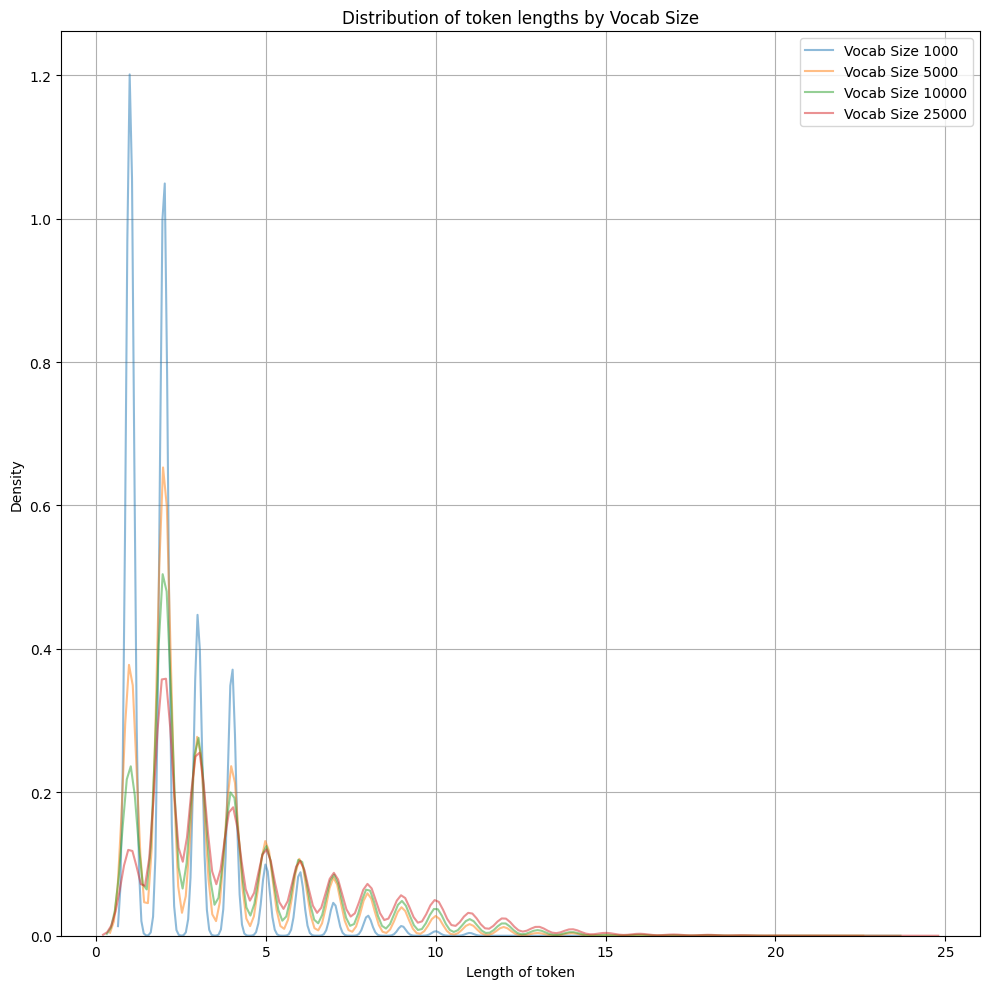

In [10]:
vis_density(size_grid[-4:])